In [1]:
import os
import sys
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download as dd
from src import data_testing as dt

In [2]:
data_dict = dd.get_dataframes()

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [3]:
ord_table, cat_table = dd.get_tables(data_dict)

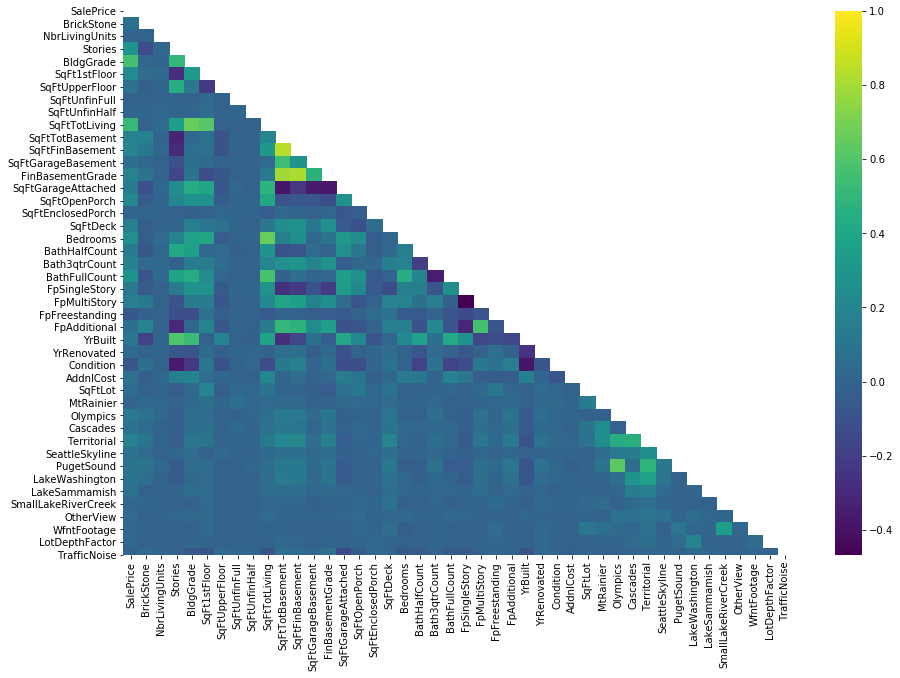

In [4]:
dt.make_heatmap(ord_table)

In [5]:
predictors = ord_table[['SalePrice','SqFtDeck', 'BldgGrade', 'YrBuilt']]
model = dt.produce_model(predictors, 'SalePrice')

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     4966.
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:03:53   Log-Likelihood:            -3.5366e+05
No. Observations:               25761   AIC:                         7.073e+05
Df Residuals:                   25757   BIC:                         7.074e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.533e+06   9.67e+04     36.527      0.000    3.34e+06    3.72e+06
SqFtDeck      77.2653      7.100     10.882      0.000      63.349      91.182
BldgGrade   1.884e+05   1636.907    115.097      0.000    1.85e+05    1.92e+05
YrBuilt    -2169.8804     51.968    -41.754      0.000   -2271.741   -2068.020
==============================================================================
Omnibus:                     1693.111   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2303.164
Skew:                           0.587   Prob(JB):                         0.00
Kurtosis:                       3.875   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

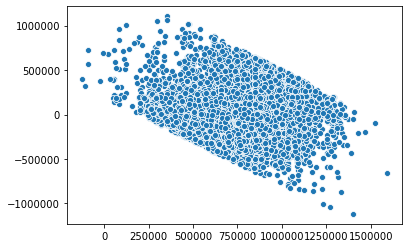

{'rainbow_stat': 0.9697859605205196, 'rainbow_p_value': 0.9591376363207255}


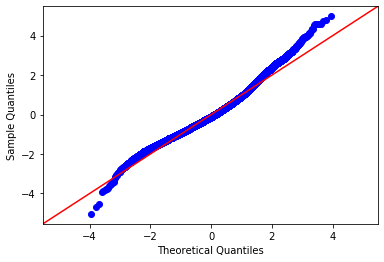

         VIF    feature
0   1.439127   SqFtDeck
1  66.270088  BldgGrade
2  64.939153    YrBuilt


In [7]:
dt.check_assumptions(model, predictors.drop('SalePrice', axis = 1))